# Regression analysis

### Loading the AMES housing dataset

In [2]:
import pandas as pd 
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t', usecols=['Overall Qual',
                                                                                          'Overall Cond',
                                                                                          'Gr Liv Area',
                                                                                          'Central Air',
                                                                                          'Total Bsmt SF',
                                                                                          'SalePrice'])
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [4]:
print(f"Dataset size: {df.shape}")
print(f"Datatypes: {df.dtypes}")

Dataset size: (2930, 6)
Datatypes: Overall Qual       int64
Overall Cond       int64
Total Bsmt SF    float64
Central Air       object
Gr Liv Area        int64
SalePrice          int64
dtype: object


In [6]:
df['Central Air'] = df['Central Air'].astype('category')

In [7]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [8]:
# remove this single example for the dataset
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

Let's do some exploratory data analysis first

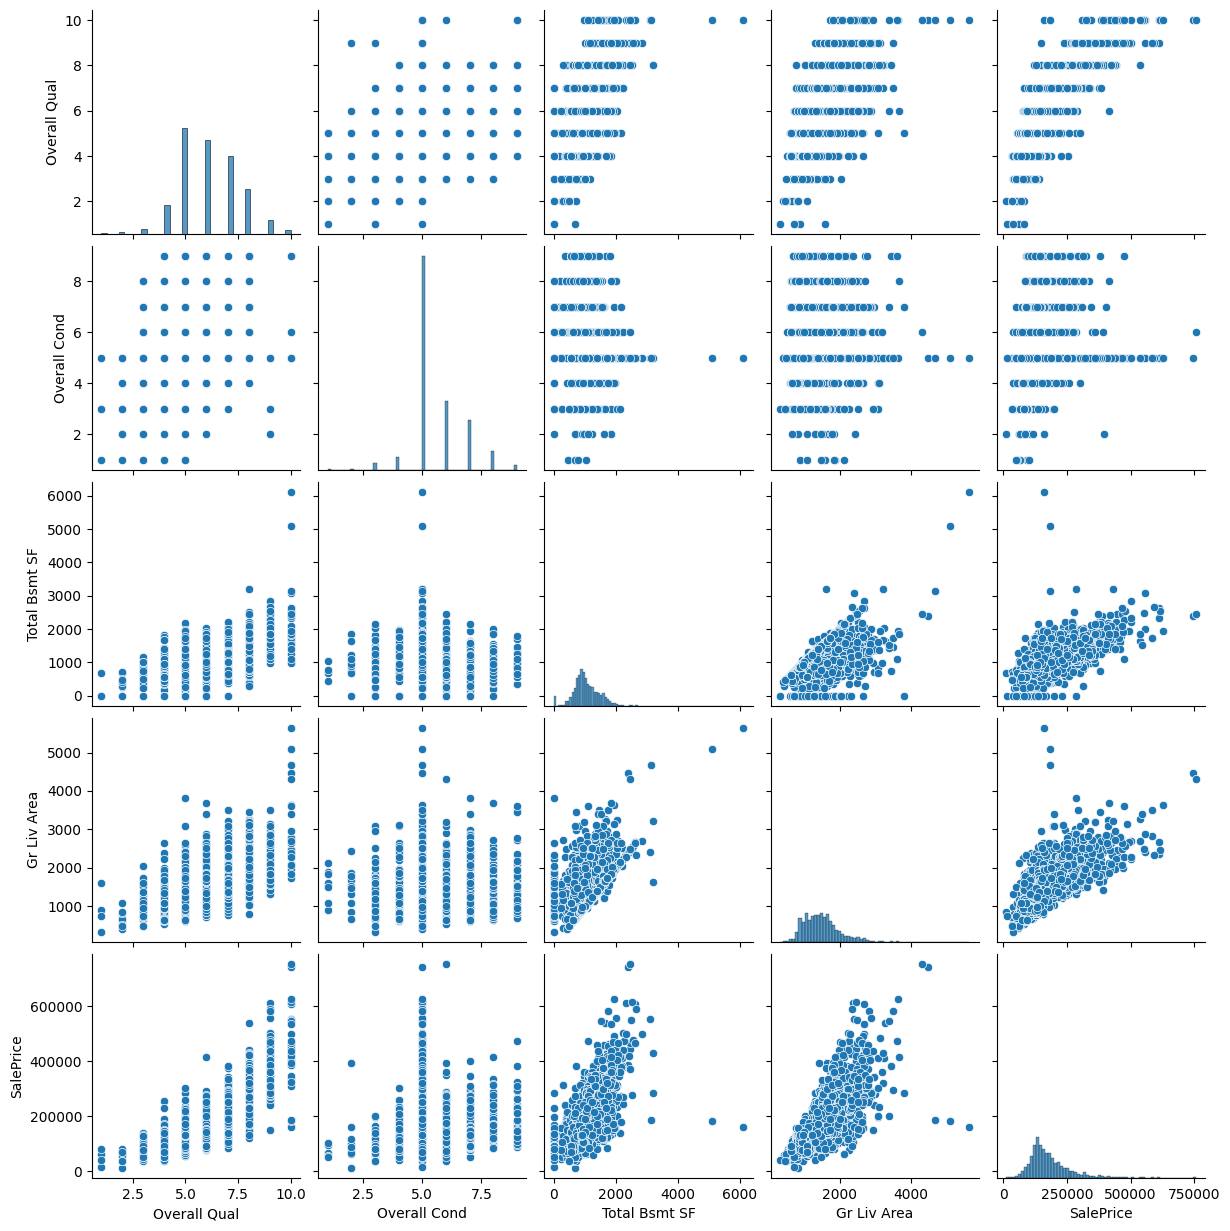

In [12]:
import seaborn as sns 
sns.pairplot(data=df, diag_kind='hist');

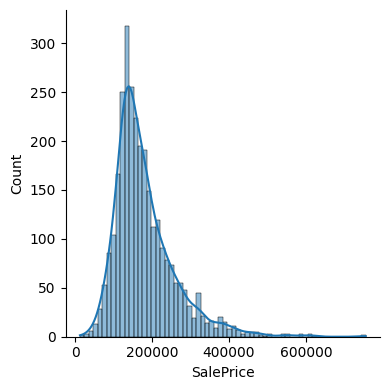

In [16]:
sns.displot(data=df, x="SalePrice", kde=True, height=4);

In [22]:
num_df = df.copy()
num_df['Central Air'] = df['Central Air'].cat.codes 
num_df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


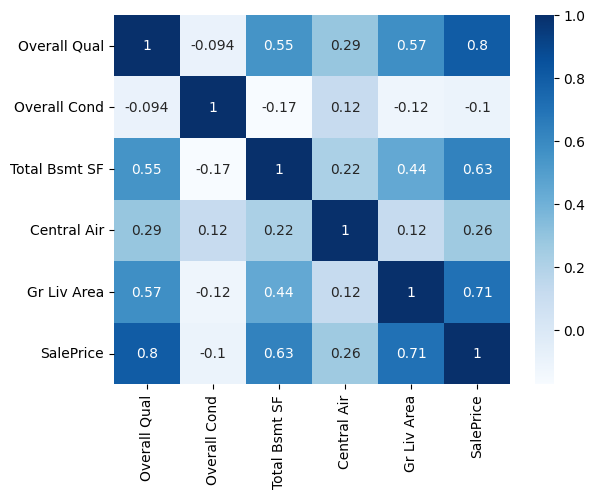

In [27]:
sns.heatmap(data=num_df.corr(), cmap='Blues', annot=True);

In [30]:
import numpy as np 
X = df[['Gr Liv Area']].values 
y = df['SalePrice'].values
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X) 
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [37]:
X_std.shape, y_std.shape

((2929, 1), (2929,))

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_std, y_std)

LinearRegression()

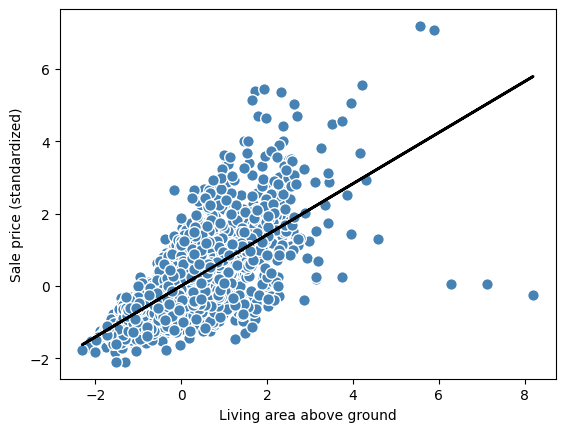

In [40]:
import matplotlib.pyplot as plt 
preds = lr.predict(X_std)
plt.plot(X_std, preds, color='black', lw=2)
plt.scatter(X_std, y_std, c='steelblue', edgecolor='white', s=70)
plt.xlabel('Living area above ground')
plt.ylabel('Sale price (standardized)')
plt.show()

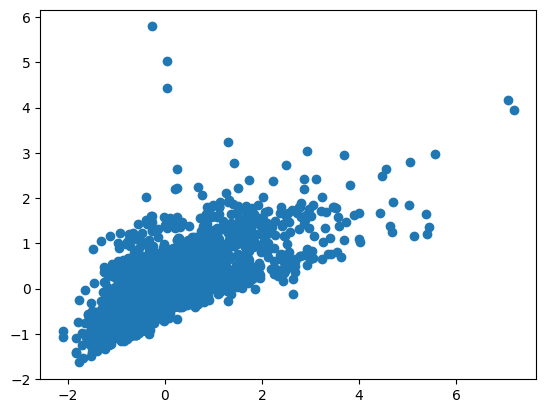

In [59]:
plt.scatter(y_std, preds)

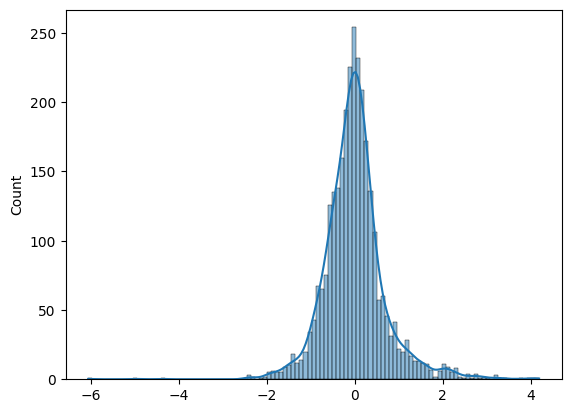

In [48]:
sns.histplot(y_std-preds, kde=True);

In [49]:
import scipy 
scipy.stats.shapiro(y_std-preds)

ShapiroResult(statistic=0.9210765957832336, pvalue=1.1133530193258266e-36)

Thus the residuals are not normally distributed... The null hyptohesis that they would be is rejected.

Shapiro-Wilk test statistic:  ShapiroResult(statistic=0.9985593557357788, pvalue=0.5938098430633545)


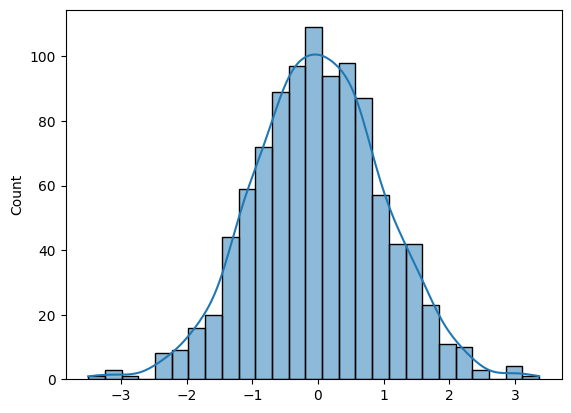

In [60]:
normal_numbers = np.random.randn(1000)
sns.histplot(normal_numbers, kde=True)
print('Shapiro-Wilk test statistic: ', scipy.stats.shapiro(normal_numbers))

Thus the null hypothesis is not rejected in this case, which means that there is no evidence that the distribution is not normally distributed. However this does **NOT** imply that there is evidence to assume the distribution is normally distributed.

### Statsmodels supports a more R-like implementation

In [41]:
import statsmodels.api as sm 
mod = sm.OLS(y_std, X_std)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.499
Method:                 Least Squares   F-statistic:                              2920.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:21:32   Log-Likelihood:                         -3142.9
No. Observations:                2929   AIC:                                      6288.
Df Residuals:                    2928   BIC:                                      6294.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------